<!--NAVIGATION-->
< [什么是机器学习？](05.01-What-Is-Machine-Learning.ipynb) | [目录](Index.ipynb) | [超参数及模型验证](05.03-Hyperparameters-and-Model-Validation.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Introducing Scikit-Learn

> There are several Python libraries which provide solid implementations of a range of machine learning algorithms.
One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms. Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation. A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

Python中有許多軟件包提供了一系列的機器學習算法實現。其中最知名的是[Scikit-Learn](http://scikit-learn.org)，它提供了大量的通用算法的高效實現。 Scikit-Learn提供了一套乾淨、統一和流式的API，還有非常實用及完整的在線文檔。這種統一性的優點在於，一旦你理解了Scikit-Learn其中一種模型的基本使用方法和語法，再去使用另一種模型或算法的切換過程基本是無痛的。

## Data Representation in Scikit-Learn

### Data as table 列表

> Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as ``n_samples``.

這個數據集中每一行都代表一朵獨立觀察的花，所以數據集的總行數就是觀察到的花的總數量。總的來說，我們將這些行組成的矩陣稱為*樣本*，總行數被稱為`n_samples`。

> Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as ``n_features``.

同樣的，數據集中的每一列都代表我們在每個樣本中觀測到的特徵的數值信息。於是，我們將這些列組成的矩陣稱為*特徵*，總列數被稱為`n_features`。

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Features matrix 特徵

> This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *features matrix*.
By convention, this features matrix is often stored in a variable named ``X``.
The features matrix is assumed to be two-dimensional, with shape ``[n_samples, n_features]``, and is most often contained in a NumPy array or a Pandas ``DataFrame``, though some Scikit-Learn models also accept SciPy sparse matrices.

這樣的表構造很清晰地表明信息是可以被想像成一個二維的數值數組或矩陣，也就是我們常說的*特徵矩陣*。習慣上，特徵矩陣通常被保存在變量`X`中。特徵矩陣被認為是一個形狀為`[n_samples, n_features]`的二維矩陣，而且一般都是保存在NumPy數組或者Pandas的`DataFrame`中，雖然一些Scikit-Learn模型也能接受SciPy稀疏矩陣作為輸入。

### Target array 目標陣列

> In addition to the feature matrix ``X``, we also generally work with a *label* or *target* array, which by convention we will usually call ``y``.
The target array is usually one dimensional, with length ``n_samples``, and is generally contained in a NumPy array or Pandas ``Series``.
The target array may have continuous numerical values, or discrete classes/labels.
While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, ``[n_samples, n_targets]`` target array, we will primarily be working with the common case of a one-dimensional target array.

除了特徵矩陣`X`，我們也通常需要*標籤*或*目標*數組，習慣上我們稱它為`y`。目標數組一般是一維的，具有長度`n_samples`，一般保存在一個一維NumPy數組或者Pandas的`Series`中。目標數組可能具有連續的數值或者離散的分類或標籤。雖然一些Scikit-Learn評估器也可以處理二維的多目標值，形狀為`[n_samples, n_targets]`的數組，但是我們主要聚焦在一維目標數組的通常應用場景中。
> Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to *predict from the data*: in statistical terms, it is the dependent variable.
For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the ``species`` column would be considered the target array.

通常讓人混淆的一點是目標數組與其他特徵列的區別。目標數組的區別特性表現在於它們通常是我們希望用來*預測數據*的量：在統計學術語中，它被稱為因變量。例如，我們希望從上面的數據中構造一個模型用來從新的測量數據中預測鳶尾花的種類；在這個情況下，`species`列可以被認為是目標數組。# 我們可以從`DataFrame`中提取出特徵矩陣和目標數組，用 Pandas `DataFrame`技巧：


In [2]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [3]:
y_iris = iris['species']
y_iris.shape

(150,)

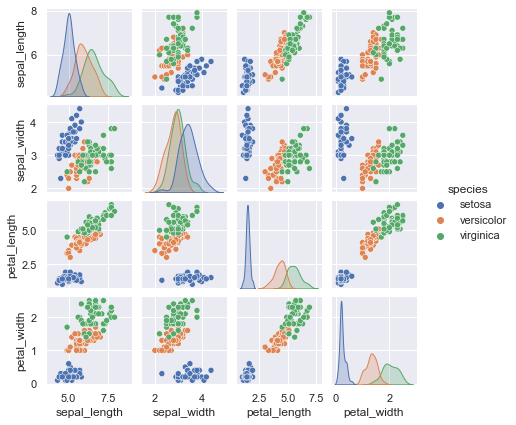

In [4]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

> To summarize, the expected layout of features and target values is visualized in the following diagram:

![](figures/05.02-samples-features.png)
[附录中生成图像的代码](06.00-Figure-Code.ipynb#Features-and-Labels-Grid)

## Scikit-Learn's Estimator API
### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows(we will step through a handful of detailed examples in the sections).

> 1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
> 2. Choose model hyperparameters by instantiating this class with desired values.
> 3. Arrange data into a features matrix and target vector following the discussion above.
> 4. Fit the model to your data by calling the ``fit()`` method of the model instance.
> 5. For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
> 6. For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.
   
最通常的情況下，你可以依照下面的步驟來使用Scikit-Learn評估器API（我們後面會按照這些步驟運行許多詳細的例子）。

1. 通過載入合適的Scikit-Learn評估器類選擇一個模型的類型。
2. 通過使用需要的值作為模型的超參數來實例化模型對象。
3. 按照上面的方式將數據分為特徵矩陣和目標向量。
4. 通過調用模型實例的`fit()`方法將你的模型與數據進行擬合。
5. 對於有監督學習，通常我們使用`predict()`方法來預測未知數據的標籤。
6. 對於無監督學習，通常我們使用`transform()`方法來轉換或推斷數據的屬性。

### Supervised learning example: Simple linear regression

### 有監督學習例子：簡單線性回歸

> As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to $(x, y)$ data. We will use the following simple data for our regression example:

作為第一個例子，讓我們考慮簡單的線性回歸，也就是最常見的將一根直線擬合到$(x, y)$數據上。我們使用下面簡單的數據來作為回歸的例子：

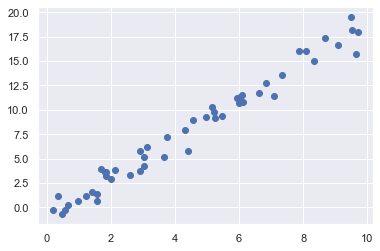

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#### 1. Choose a class of model 選擇模型

> In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class: Note that other more general linear regression models exist as well; you can read more about them in the [``sklearn.linear_model`` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).


在Scikit-Learn中，每個模型類型都是一個Python類。因此如果我們希望計算簡單的線性回歸模型，我們可以載入線性回歸類：更多通用的線性回歸模型在[`sklearn.linear_model` 模塊的在線文檔](http://Scikit-Learn.org/stable/modules/linear_model.html)。

In [6]:
from sklearn.linear_model import LinearRegression

#### 2. Choose model hyperparameters 選擇模型超參數

我們決定了我們模型類別之後，還有一些參數可以進行選擇。取決於我們選擇的模型類別：

- 我們需要擬合偏移（例如y截距）嗎？
- 我們需要模型歸一化嗎？
- 我們需要預處理特徵來增加模型的靈活性嗎？
- 在我們的模型中正則化的角度是多少？
- 我們想要使用多少個模型的組件？

> These are examples of the important choices that must be made *once the model class is selected*.
These choices are often represented as *hyperparameters*, or parameters that must be set before the model is fit to data.
In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.For our linear regression example, we can instantiate the ``LinearRegression`` class and specify that we would like to fit the intercept using the ``fit_intercept`` hyperparameter:


一旦模型類別選定後，上面列出的都是一些重要的選擇。這些選擇通常被稱為*超參數*，或者解釋為在模型擬合數據前被設置的參數。在Scikit-Learn中，超參數通過向模型實例傳遞參數值來設置。我們會在[超參數和模型驗證](05.03-Hyperparameters-and-Model-Validation.ipynb)一節中深入討論如何定量調整這些超參數的值。對於我們線性回歸例子來說，我們可以實例化`LinearRegression`類並且使用`fit_intercept`參數來設置你是否希望擬合截距值：




> Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.
In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between *choice of model* and *application of model to data*.

記住當模型被實例化後，唯一的動作就是保存了超參數的值。也就是說我們還未將模型應用到任何數據上：Scikit-Learn API將*模型選擇*和*將模型應用在數據上*區分的很清楚。

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

#### 3. Arrange data into a features matrix and target vector (將數據組合成特徵矩陣和目標向量)

> Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array.
Here our target variable ``y`` is already in the correct form (a length-``n_samples`` array), but we need to massage the data ``x`` to make it a matrix of size ``[n_samples, n_features]``.
In this case, this amounts to a simple reshaping of the one-dimensional array:

前面我們詳細介紹了Scikit-Learn數據表示，它需要一個二維的特徵矩陣和一個一維的目標數組。這裡我們的目標變量`y`已經是正確格式了（長度為`n_samples`的數組），但是我們需要將數據`x`變成一個形狀為`[n_samples, n_features]`的矩陣。在這個情況下，我們需要將一個一維數組進行變形：

In [8]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the model to your data (將模型擬合數據)

> Now it is time to apply our model to data. This can be done with the ``fit()`` method of the model:
This ``fit()`` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
In Scikit-Learn, by convention all model parameters that were learned during the ``fit()`` process have trailing underscores; for example in this linear model, we have the following:

將我們的模型應用在數據上可以通過模型的`fit()`方法實現：執行`fit()`方法會導致一系列的模型內部計算，計算得到的結果會保存在模型對象的屬性上，用戶可以查看它們。在Scikit-Learn中習慣上所有通過`fit()`過程學習得到的模型參數都有下劃線後綴；例如在這個線性模型中，我們有下面的屬性：

In [9]:
model.fit(X, y)

LinearRegression()

In [10]:
model.coef_

array([1.9776566])

In [11]:
model.intercept_

-0.9033107255311164

> These two parameters represent the slope and intercept of the simple linear fit to the data.
Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

這兩個參數代表著我們擬合數據後得到的斜率和截距。回想我們的數據定義，我們很容易看出它們很接近輸入的斜率2和截距-1.

> One question that frequently comes up regards the uncertainty in such internal model parameters.
In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a *statistical modeling* question than a *machine learning* question.
Machine learning rather focuses on what the model *predicts*.
If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the [Statsmodels Python package](http://statsmodels.sourceforge.net/).

一個經常被提到的問題就是關於這樣的模型內部參數的不確定性。通常 Scikit-Learn不提供工具來對內部模型參數本身進行概括：解釋模型參數更多是一個*統計模型*問題而非一個*機器學習*問題。機器學習更加聚焦的是模型*預測*的內容。深入了解模型擬合參數的含義可以使用別的工具[統計模型 Python 包](http://statsmodels.sourceforge.net/)。

#### 5. Predict labels for unknown data 對未知數據進行預測

> Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the ``predict()`` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

對未知數據進行預測一旦模型訓練好了，有監督機器學習的主要任務就是用它來評估不屬於訓練集的數據結果。在Scikit-Learn中，可以通過`predict()`方法來實現。在這個例子中，我們的“新數據”是一個*x*值的網格，我們使用模型來預測出相應的*y*值：

In [12]:
xfit = np.linspace(-1, 11)

> As before, we need to coerce these *x* values into a ``[n_samples, n_features]`` features matrix, after which we can feed it to the model:

如前所述，我們需要將這個x向量轉變成一個`[n_samples, n_features]`的特徵矩陣，然後才能使用模型進行預測：

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

> Finally, let's visualize the results by plotting first the raw data, and then this model fit:

最後，畫出原始數據的散點和新數據的直線：

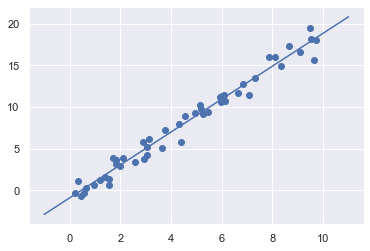

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### Supervised learning example: Iris classification 
### 監督式學習：鳶尾花分類

> given a model trained on a portion of the Iris data, how well can we predict the remaining labels? For this task, we will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution (see [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) for more details).
Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

對於這個任務來說，我們會使用一個極端簡單的生成模型，稱為高斯樸素貝葉斯模型，它的算法思想就是假設每個分類都可以從軸對齊的高斯分佈獲得（參見[深入：樸素貝葉斯分類](05.05-Naive-Bayes.ipynb)）。這個模型速度極快並且沒有需要選擇的超參數，因此高斯樸素貝葉斯經常可以用來作為一個基準分類模型，在我們使用更複雜的模型進行性能優化之前優先使用它。我們的問題是：給定鳶尾花數據集的一部分用來訓練模型，我們能多好的預測剩餘數據的標籤？

> We would like to evaluate the model on data it has not seen before, and so we will split the data into a *training set* and a *testing set*.
This could be done by hand, but it is more convenient to use the ``train_test_split`` utility function:

我們希望通過模型沒有訓練到的數據對它的性能進行評估，因此我們需要將數據分為*訓練集*和*測試集*。這可以通過手工完成，還可以使用`train_test_split`工具函數很方便的實現：

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,random_state=1)

> With the data arranged, we can follow our recipe to predict the labels:

數據準備好後，我們可以依照步驟對測試集數據的標籤進行預測：

In [16]:
from sklearn.naive_bayes import GaussianNB # 1. 选择模型类别
model = GaussianNB()                       # 2. 实例化模型
model.fit(Xtrain, ytrain)                  # 3. 拟合数据
y_model = model.predict(Xtest)             # 4. 预测新数据

> Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true value: With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

最後，我們可以通過`accuracy_score`工具來查看有多少比例的標籤我們是預測正確的：準確率高達97%，這個數據集來說即使如此簡單的分類算法也可以非常有效。

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised learning example: Iris dimensionality 

### 無監督學習例子：鳶尾花數據集降維

> As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four dimensional: there are four features recorded for each sample.

作為無監督學習問題的例子，我們來看一下對鳶尾花數據集進行降維處理令它們更容易可視化。我們都已經知道鳶尾花數據集有四個維度：也就是每個樣本都記錄了四個特徵的數據。

> The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher! Following the sequence of steps outlined earlier, we have: 

降維的任務是找出是否有一種合適的低緯度數據表示能基本保留了數據的關鍵特徵。通常降維都被用來幫助數據可視化：畢竟在二維數據上作圖肯定比在四維甚至更高維度上作圖容易的多。依照前面介紹的步驟，我們可以：

In [18]:
from sklearn.decomposition import PCA  # 1. 選擇模型類別
model = PCA(n_components=2)            # 2. 實例化模型，設置超參數
model.fit(X_iris)                      # 3. 擬合數據，注意這裡沒有y參數
X_2D = model.transform(X_iris)         # 4. 將數據轉換為二維

> Now let's plot the results. A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results: We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

下面繪製結果。最簡單的方式是將結果作為列插入回原始的鳶尾花`DataFrame`，然後使用Seaborn的`lmplot`來展示結果：我們發現在二維數據表示中，花的種類也是很容易分開的，即使在PCA算法對於種類標籤根本沒有了解。這也體現了這個數據集可以相對直接的進行分類，就像前面看到的那樣。

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


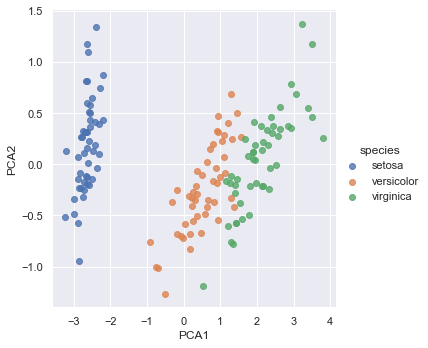

In [19]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### Unsupervised learning: Iris clustering

### 無監督學習：鳶尾花數據集聚類

> Let's next look at applying clustering to the Iris data.
A clustering algorithm attempts to find distinct groups of data without reference to any labels.
Here we will use a powerful clustering method called a Gaussian mixture model (GMM), discussed in more detail in [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb). A GMM attempts to model the data as a collection of Gaussian blobs.We can fit the Gaussian mixture model as follows:

下面我們來看看將聚類算法應用在鳶尾花數據集上的情況。聚類算法試圖在沒有任何標籤的數據集中找出不同的分組。下面我們會使用一個強大的聚類方法稱為高斯混合模型（GMM），我們會在[深入：高斯混合模型](05.12-Gaussian-Mixtures.ipynb)中詳細介紹它。 GMM試圖將數據看成是一組高斯族群。我們可以如下擬合高斯混合模型：

In [20]:
from sklearn.mixture import GaussianMixture                      # 1. 選擇模型類型
model = GaussianMixture(n_components=3, covariance_type='full')  # 2. 實例化模型，設置超參數
model.fit(X_iris)                                                # 3. 擬合數據，注意y沒有設置
y_gmm = model.predict(X_iris)                                    # 4. 預測值

> As before, we will add the cluster label to the Iris ``DataFrame`` and use Seaborn to plot the results: By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the *setosa* species is separated perfectly within cluster 0, while there remains a small amount of mixing between *versicolor* and *virginica*.
This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could *automatically* identify the presence of these different groups of species with a simple clustering algorithm!
This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.

想之前一樣，我們會給鳶尾花`DataFrame`添加聚類列，然後使用Seaborn繪製結果：使用聚類編號將數據分開，我們可以清楚的看到GMM算法運行的多麼良好：*setosa*種類被完美地分到了群組0，剩下的*versicolor*和*virginica*有一點混在一起，但是也比較準確。這意味著即使在沒有專家告訴我們如何區分不同種類的花的情況下，我們也可以使用計算機*自動*根據聚類算法將它們區分出來。這種算法還可以為專家提供他們觀測的樣本之間聯繫的線索。

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


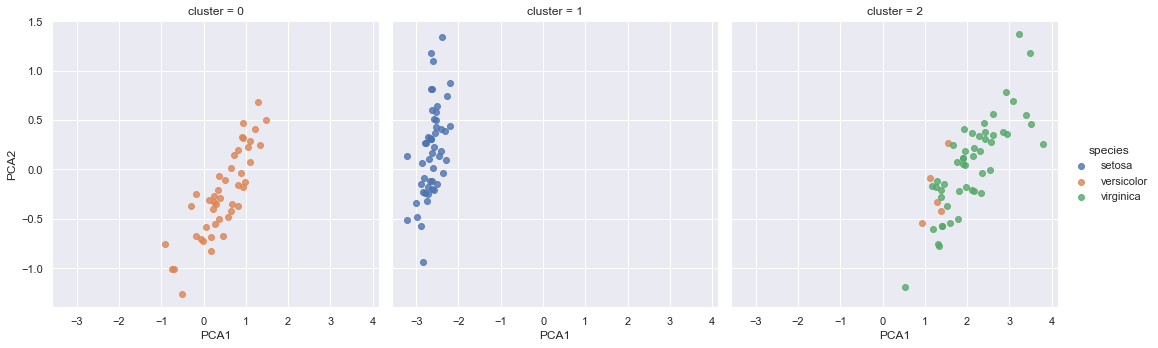

In [21]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

## Application: Exploring Hand-written Digits

## 應用：分析手寫數字

> To demonstrate these principles on a more interesting problem, let's consider one piece of the optical character recognition problem: the identification of hand-written digits.
In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.

下面我們要在一個更加有趣的問題中展示這些方法，考慮一個圖像識別的問題：手寫數字的自動識別。正常情況下，這個問題包括了定位和識別圖像中的字母。這裡我們抄了一個捷徑，使用Scikit-Learn自帶的預處理過的圖像。

### Loading and visualizing the digits data

> We'll use Scikit-Learn's data access interface and take a look at this data:

我們使用Scikit-Learn的數據訪問接口來載入這些圖像並且查看一下數據內容：

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

> The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these:

圖像數據是三維數組：1797個樣本每個包括8 × 8像素的圖。我們可以展示頭100張：

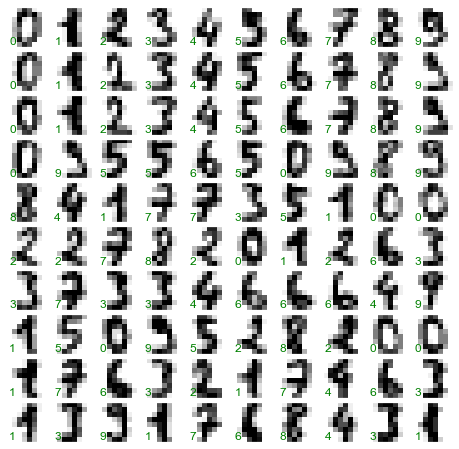

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

> In order to work with this data within Scikit-Learn, we need a two-dimensional, ``[n_samples, n_features]`` representation. We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. Additionally, we need the target array, which gives the previously determined label for each digit. These two quantities are built into the digits dataset under the ``data`` and ``target`` attributes, respectively: We see here that there are 1,797 samples and 64 features.

為了要在Scikit-Learn中使用這個數據集，我們需要一個二維的`[n_samples, n_features]`數據表示。在本例中我們可以將圖像中的每個像素點當成一個特徵：也就是說，通過將每個圖像的像素數組平鋪展開成一個長度為64的一維數組。除此之外，我們還需要目標數組，如上圖一樣是每張圖標記的數字組成的數組。這兩個量已經在數據集中內建好了，分別叫做`data`和`target`屬性：我們看到一共有1797個樣本和64個特徵。

In [24]:
X = digits.data
X.shape

(1797, 64)

In [25]:
y = digits.target
y.shape

(1797,)

### Unsupervised learning: Dimensionality reduction

### 無監督學習：降維

> We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space. Instead we'll reduce the dimensions to 2, using an unsupervised method. Here, we'll make use of a manifold learning algorithm called *Isomap* (see [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb)), and transform the data to two dimensions:

我們希望能夠將我們的點在一個64維的參數空間中可視化出來，但是在這麼高的維度上有效的可視化是非常困難的。所以我們轉而使用無監督方法將維度減至二維。這裡我們使用的是流形學習算法*Isomap*（參見[深入: 流形學習](05.10-Manifold-Learning.ipynb)），然後將數據轉換成二維：

In [26]:
from sklearn.manifold import Isomap # 选择模型类别
iso = Isomap(n_components=2) # 实例化模型，设置超参数
iso.fit(digits.data) # 拟合数据，这里也没有y参数
data_projected = iso.transform(digits.data) # 转换数据到二维
data_projected.shape

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

> We see that the projected data is now two-dimensional.
Let's plot this data to see if we can learn anything from its structure:

我們看到映射後的數據現在是二維的了。下面我們把降維後的數據繪製出來看我們學習的成果：

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_6053/1763508088.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='digit label', ticks=range(10))


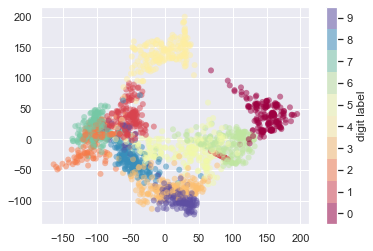

In [27]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

> This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. For example, zeros (in black) and ones (in purple) have very little overlap in parameter space.
Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle.
On the other hand, there seems to be a more or less continuous spectrum between ones and fours: we can understand this by realizing that some people draw ones with "hats" on them, which cause them to look similar to fours.

上圖給我們展現了數據集在高維度-64維空間很直觀的分佈情況展示。例如數字0和1在特徵矩陣空間很少重疊。這很容易理解：0在圖像中間有個空白區域，而1中間沒有空白區域。另一方面，數字1和4幾乎有著很連續的圖譜：當我們一直到一些人寫數字1時會加上“帽子”時，這就容易理解了，這回造成兩者看起來很相似。

> Overall, however, the different groups appear to be fairly well separated in the parameter space: this tells us that even a very straightforward supervised classification algorithm should perform suitably on this data.

大體來說，上圖說明不同的數字在它們的特徵矩陣空間中都能較好的區分開：這表示即使是一個很直接簡單的有監督分類算法應該也能適合分類這個數據集。

### Classification on digits

> Let's apply a classification algorithm to the digits.
As with the Iris data previously, we will split the data into a training and testing set, and fit a Gaussian naive Bayes model:

下面我們在手寫數字上應用分類算法。就像前面鳶尾花數據那樣，我們將數據集分為訓練集和測試集，然後將這些訓練數據擬合到高斯樸素貝葉斯模型中：

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

> Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

我們已經預測了我們的模型，我們可以將得到的預測結果和測試集的目標向量進行比較得到模型的準確率：

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

> With even this extremely simple model, we find about 80% accuracy for classification of the digits!
However, this single number doesn't tell us *where* we've gone wrong—one nice way to do this is to use the *confusion matrix*, which we can compute with Scikit-Learn and plot with Seaborn:

使用這個非常簡單的模型，我們得到了大約80%的數字分類的準確率。然而這個數字並不能告訴我們*哪裡*出錯了，輸出*混淆矩陣*是一個好辦法，可以使用Scikit-Learn計算它並使用Seaborn繪製圖表：

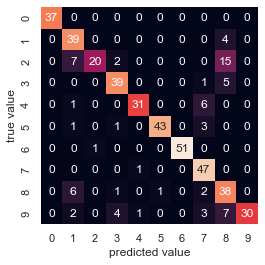

In [31]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

> This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights.
Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels.
We'll use green for correct labels, and red for incorrect labels:

上圖為我們展示了哪些數字更容易被錯誤標記：例如比較多的數字2被錯誤分類到了數字1或數字8。另一種直觀展示模型準確率的方法是繪製輸入的數字圖像，還有它們預測的標籤。我們使用綠色展示預測正確的標籤，紅色展示錯誤的標籤：

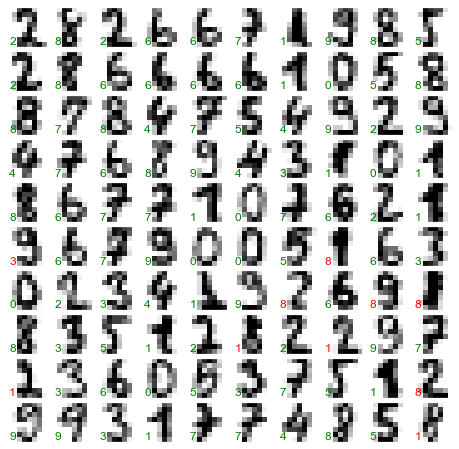

In [32]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

> Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally.
To go beyond our 80% classification rate, we might move to a more sophisticated algorithm such as support vector machines (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)), random forests (see [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)) or another classification approach.

通過檢查這個數據子集，我們也能獲得算法在什麼情況下變現的不盡人意。要獲得超越80%分類準確率，我們需要轉向更複雜的算法例如支持向量機（參見[深入：支持向量機](05.07-Support-Vector-Machines.ipynb)）、隨機森林（參見[深入：隨機森林](05.08-Random-Forests.ipynb)）或其他分類方法。

<!--NAVIGATION-->
< [什么是机器学习？](05.01-What-Is-Machine-Learning.ipynb) | [目录](Index.ipynb) | [超参数及模型验证](05.03-Hyperparameters-and-Model-Validation.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
